In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
train_set = pd.read_hdf("train_set0517.h5")
test_set = pd.read_hdf("test_set0517.h5")

In [5]:
x_train_data = train_set[['YEAR', 'MONTH', 'DAY', 'TMAX', 'TMIN', 'TAVG', 'PRCP']]
x_train_data = x_train_data.drop(x_train_data.index[-1])
x_test_data = test_set[['YEAR', 'MONTH', 'DAY', 'TMAX', 'TMIN', 'TAVG', 'PRCP']]
x_test_data = x_test_data.drop(x_test_data.index[-1])

In [6]:
from tensorflow.keras import backend as K

D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; 

In [7]:
x_train = K.cast_to_floatx(x_train_data.values.reshape((x_train_data.shape[0], 1, x_train_data.shape[1])))
x_test = K.cast_to_floatx(x_test_data.values.reshape((x_test_data.shape[0], 1, x_test_data.shape[1])))

In [10]:
y_train_TAVG_data = train_set[['TAVG_Interval']].astype(int)
y_train_TAVG = y_train_TAVG_data.drop(y_train_TAVG_data.index[0])

y_test_TAVG_data = test_set[['TAVG_Interval']].astype(int)
y_test_TAVG = y_test_TAVG_data.drop(y_test_TAVG_data.index[0])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [11]:
TAVG_model = Sequential()
TAVG_model.add(GRU(256, dropout = 0.25, recurrent_dropout = 0.25, input_shape = (
    x_train.shape[1], x_train.shape[2])))
TAVG_model.add(Dense(100, activation = 'relu'))
TAVG_model.add(Dense(80, activation = 'sigmoid'))
TAVG_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
TAVG_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 256)               202752    
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8080      
Total params: 236,532
Trainable params: 236,532
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = TAVG_model.fit(x_train, y_train_TAVG, batch_size = 50, epochs = 20, validation_data = (x_test, y_test_TAVG))

Train on 4060570 samples, validate on 414830 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
4060570/4060570 [==============================] - 526s 130us/sample - loss: 0.4618 - acc: 0.8231 - val_loss: 0.6243 - val_acc: 0.7669
Epoch 2/20
4060570/4060570 [==============================] - 503s 124us/sample - loss: 0.3993 - acc: 0.8429 - val_loss: 0.4789 - val_acc: 0.8232
Epoch 3/20
4060570/4060570 [==============================] - 505s 124us/sample - loss: 0.3665 - acc: 0.8567 - val_loss: 0.4628 - val_acc: 0.8264
Epoch 4/20
4060570/4060570 [==============================] - 510s 126us/sample - loss: 0.3587 - acc: 0.8591 - val_loss: 0.4629 - val_acc: 0.8232
Epoch 5/20
4060570/4060570 [==============================] - 512s 126us/sample - loss: 0.3533 - acc: 0.8614 - val_loss: 0.4901 - val_acc: 0.8216
Epoch 6/20
4060570/4060570 [==============================] - 501s 123us/sample - loss: 0.3506 - acc: 0.8624 - val_loss: 0.

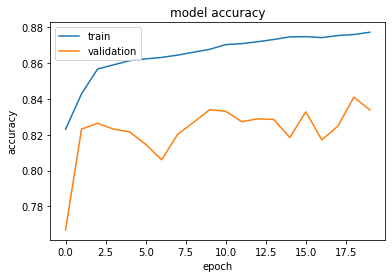

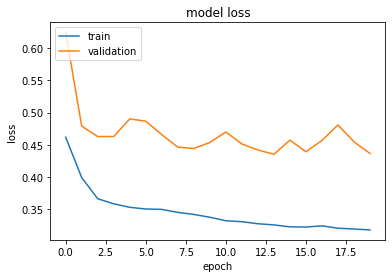

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
TAVG_model.save_weights('TAVG_model.h5')